First, we import the necessary libraries

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
from messy_nd import *

We generate samples of a bi-modal distribution as the target density that we would like to infer it from its samples.

sample.shape =  (5000, 2)


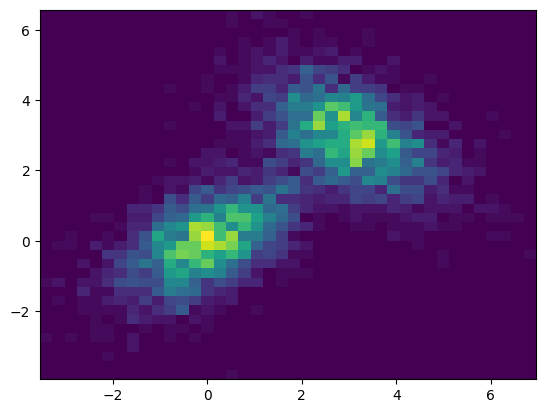

In [10]:
from scipy.stats import multivariate_normal

N = 5000 # number of samples
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
samples1 = np.random.multivariate_normal(mean1, cov1, int(N/2))

mean2 = [3, 3]
cov2 = [[1, -0.5], [-0.5, 1]]
samples2 = np.random.multivariate_normal(mean2, cov2, N-int(N/2))

# Combine the two sets of samples to make bi-modal distr.
samples = np.vstack([samples1, samples2])

print("sample.shape = ", samples.shape)
_ = plt.hist2d(samples[:,0],samples[:,1],bins=40)

In [13]:
dim = samples.shape[1]
poly_order = 4
x = sp.symbols('x:' + str(dim), real=True)
x_order = 4
n_bases = 2
tree_depth = 2
constant_range=(1,3)
def cos_(x):
  integer = random.randint(*constant_range)
  half = integer + random.choice([0, 0.5])
  return sp.cos(sp.Rational(half)*x)

def sin_(x):
  integer = random.randint(*constant_range)
  half = integer + random.choice([0, 0.5])
  return sp.cos(sp.Rational(half)*x)

pow = [lambda x, i=i: x**i for i in range(1, poly_order+1)]
binary_operators = [sp.Mul]
unary_functions = [cos_, sin_] + pow

messy = MESSY_nd(dim=dim, x_order=x_order, n_bases=n_bases, poly_order=poly_order, tree_depth=tree_depth, binary_operators = binary_operators, unary_functions = unary_functions)

N_iters = 5
dic, best_iter = messy.get_pdf(samples, N_iters=N_iters, verbose=True)

Found MESSY-P:
0.0694102139875083*exp(-0.00286408168411005*x0**4 - 0.0225906480086078*x0**3*x1 + 0.0750211781846418*x0**3 - 0.0107295712283431*x0**2*x1**2 + 0.0488651853898021*x0**2*x1 - 0.454599723537219*x0**2 - 0.0197579614574588*x0*x1**3 + 0.028131260043743*x0*x1**2 + 0.96135416847132*x0*x1 - 0.1266640049107*x0 - 0.00397705861441182*x1**4 + 0.0869841262861839*x1**3 - 0.488499442215749*x1**2 - 0.13871836454156*x1)*exp(-0.002789545872736*x0**4 - 0.00530490209602593*x0**3*x1 + 0.0313996179858953*x0**3 - 0.00412770338192614*x0**2*x1**2 + 0.0492895727054621*x0**2*x1 - 0.0571619054483688*x0**2 - 0.00130501288644615*x0*x1**3 + 0.0203255489238458*x0*x1**2 - 0.0647466161516136*x0*x1 - 0.262008443778321*x0 - 0.0028706042795506*x1**4 + 0.0333850411909801*x1**3 - 0.0652627409589021*x1**2 - 0.25771614729988*x1)



Found MESSY-S:
0.0683439141940666*exp(7.47323925481524e-5*x0**4*cos(3*x0/2) - 0.00331252383024842*x1**4)*exp(-0.0044340265171926*x0**4 - 0.0289991485251808*x0**3*x1 + 0.099358701435533

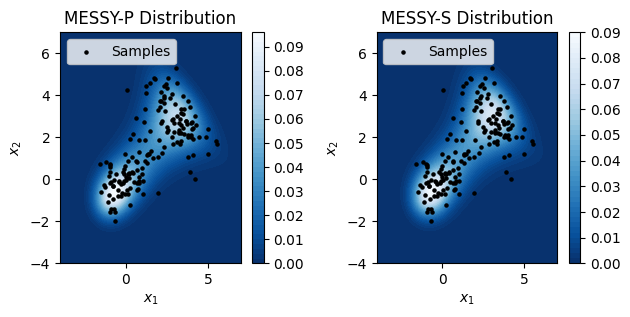

In [15]:
## xx = np.linspace(-2.5, 2.5, 1000)

print("Found MESSY-P:")
print( dic[0][1] )
print("\n\n")

print("Found MESSY-S:")
print( dic[best_iter][1] )
print("\n\n")

from matplotlib.colors import Normalize
X, Y = np.meshgrid(np.linspace(-4, 7, 100), np.linspace(-4, 7, 100))
XY = np.array([X.ravel(), Y.ravel()]).T
Z_MESSY_P = np.apply_along_axis(lambda args: dic[0][0](*args), 1, XY).reshape(X.shape)
Z_MESSY_S = np.apply_along_axis(lambda args: dic[best_iter][0](*args), 1, XY).reshape(X.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
c = ax1.contourf(X, Y, Z_MESSY_P, levels=50, cmap="Blues_r", alpha=1)
fig.colorbar(c, ax=ax1, norm=Normalize(vmin=0, vmax=np.max(Z_MESSY_P)))
ax1.scatter(samples[::30, 0], samples[::30, 1], c='black', s=5, label="Samples")
ax1.set_title("MESSY-P Distribution")
ax1.set_xlabel(r"$x_1$")
ax1.set_ylabel(r"$x_2$")
ax1.legend(loc='upper left')

c = ax2.contourf(X, Y, Z_MESSY_S, levels=50, cmap="Blues_r", alpha=1)
fig.colorbar(c, ax=ax2, norm=Normalize(vmin=0, vmax=np.max(Z_MESSY_S)))
ax2.scatter(samples[::30, 0], samples[::30, 1], c='black', s=5, label="Samples")
ax2.set_title("MESSY-S Distribution")
ax2.set_xlabel(r"$x_1$")
ax2.set_ylabel(r"$x_2$")
ax2.legend(loc='upper left')

fig.subplots_adjust(wspace=0.4)
fig.savefig("messy_bi-modal_2d.png", format="png", dpi=300)
plt.show()